# 1.  Python
## 1
1. Кортежи являются неизменяемыми. 
2. Т.к. кортежи неизменяемы, от них можно вычислять хэш. В сет и в качестве ключа в dict можно добавлять только hashable типы, т.е. только неизменяемые. Следовательно, кортежи можно использовать, а списки -- нет.
3. Dict в python реализован на хэш-таблицах => key должен быть hashable.
4. Range - возвращает список, xrange - генератор.
5. List comprehension -- удобный способ генерировать списки.
6. Map: принимает функцию и набор данных. Создаёт новую коллекцию, выполняет функцию на каждой позиции данных и добавляет возвращаемое значение в новую коллекцию. Возвращает новую коллекцию. Reduce: принимает функцию и набор пунктов. Возвращает значение, получаемое комбинированием всех пунктов.

In [5]:
#Пример map():
name_lengths = list(map(len, ['Маша', 'Петя', 'Вася']))
print (name_lengths)

[4, 4, 4]


In [9]:
#Пример reduce():
import functools
sum = functools.reduce(lambda a, x: a + x, [0, 1, 2, 3, 4])
print (sum)

10


## 2

In [13]:
def Fib(n):
    if n < 2:
        return n
    else:
        return Fib(n - 1) + Fib(n - 2)

In [17]:
print ("Fib({0}) = {1}".format(10, Fib(10)))
print ("Fib({0}) = {1}".format(20, Fib(20)))
print ("Fib({0}) = {1}".format(30, Fib(30)))

Fib(10) = 55
Fib(20) = 6765
Fib(30) = 832040


## 3

In [51]:
import time
import matplotlib.pylab as plt
%pylab inline

N = list(range(0,40,2))
times = []
for n in N:
    time1 = time.time()
    Fib(n)
    time2 = time.time()
    times.append(time2 - time1)

Populating the interactive namespace from numpy and matplotlib


d:\Users\Nikolay\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Text(0,0.5,'Time(seconds)')

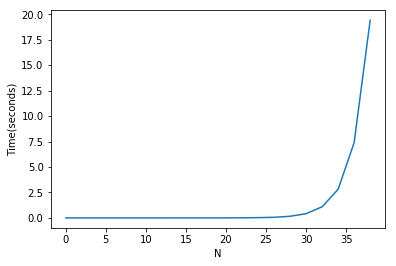

In [52]:
plt.plot(N,times)
plt.xlabel("N")
plt.ylabel("Time(seconds)")

## 4 и 5

In [78]:
def transformComplex(Re,Im):
    """
    Return module and argument of entered real and imagenery parts of complex number.
    >>> transformComplex(0,0)
    (0.0, 0.0)
    >>> transformComplex(3,4)
    (5.0, 0.9272952180016122)
    """
    if Re == 0:
        return(math.sqrt(Re**2+Im**2),0.0)
    else:
        return(math.sqrt(Re**2+Im**2),math.atan(Im/Re))

In [79]:
transformComplex(1,sqrt(3))

(1.9999999999999998, 1.0471975511965976)

In [80]:
import doctest
doctest.testmod()

TestResults(failed=0, attempted=2)

## 6

In [91]:
class ComplexNumber:
    def __init__(self, Re, Im):
        self.Re = Re
        self.Im = Im
        
    def getModule(self):
        return (math.sqrt(self.Re**2+self.Im**2))
    
    def getArg(self):
        if self.Re == 0:
            return 0
        else:
            return math.atan(self.Im/self.Re)

In [93]:
cnumber = ComplexNumber(3,4)
print (cnumber.getArg())
print (cnumber.getModule())


0.9272952180016122
5.0


## 7

In [5]:
import time

In [6]:
def timer(f):
    def tmp(*args):
        t = time.time()
        res = f(*args)
        return time.time() - t

    return tmp

In [34]:
@timer
def Fib(n):
    if n < 2:
        return n
    else:
        return Fib(n - 1) + Fib(n - 2)
    
Fib(30)

1.5463640689849854

In [28]:
def cacher(f):
    cache = {}
    def tmp(*args):
        if args in cache:
            return cache[args]
        else:
            res = f(*args)
            cache[args] = res
            return res
    return tmp

In [36]:
@cacher
@timer
def Fib(n):
    if n < 2:
        return n
    else:
        return Fib(n - 1) + Fib(n - 2)
    
Fib(30)

0.0

In [35]:
@timer
@cacher
def Fib(n):
    if n < 2:
        return n
    else:
        return Fib(n - 1) + Fib(n - 2)
    
Fib(30)

0.0

## 8 и 9

@property посзволяет отделить свойства класса от методов, позволяет обращаться к "вычисляемым" свойствам не как к функциям, а как к атрибутам

In [49]:
class ComplexNumber:
    def __init__(self):
        self.Re = None
        self.Im = None
    
    @property
    def Re(self):
        return self.Re
    
    @property
    def Im(self):
        return self.Im
    
    @Im.setter
    def Im(self, valIm):
        self.Im = valIm
        
    @Re.setter
    def Re(self, valRe):
        self.Re = valRe

In [54]:
cnumber = ComplexNumber
cnumber.Im = 1
cnumber.Re = 2

print(cnumber.Re)
print(cnumber.Im)

2
1
